C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_5272\1265006720.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='accuracy', data=results_df, palette='Blues_r')


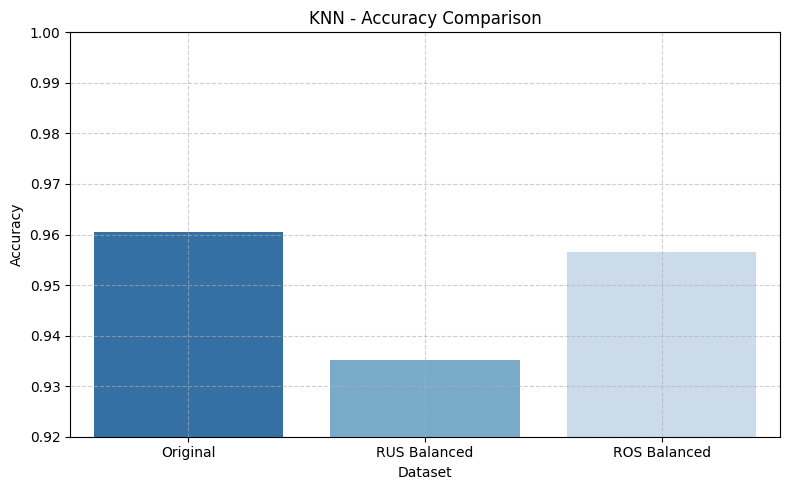

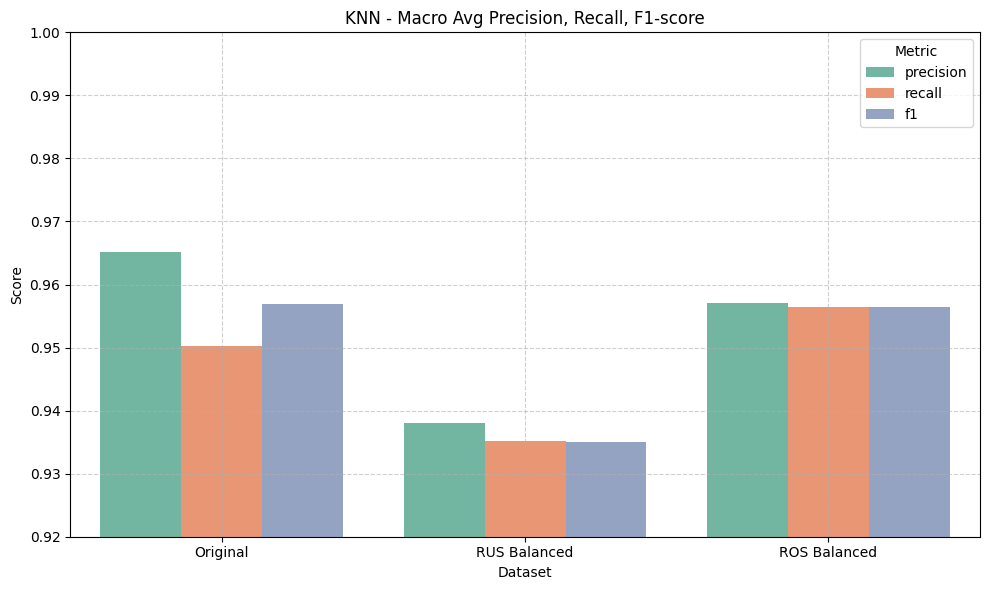

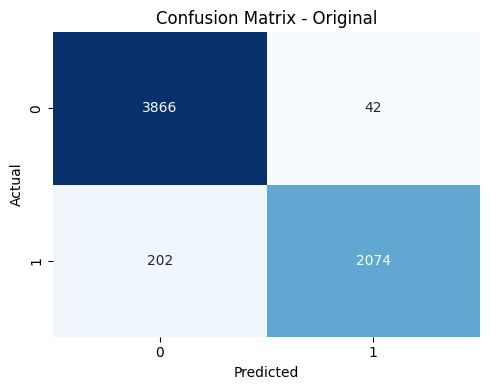

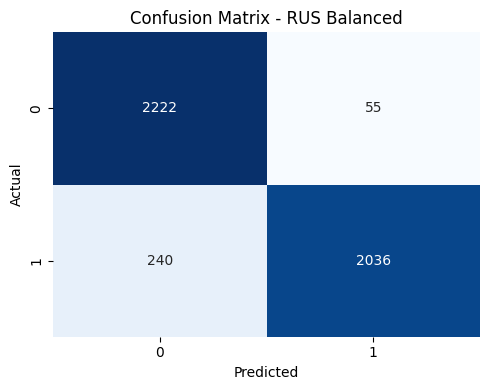

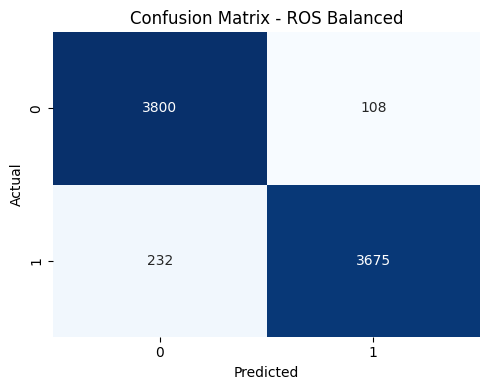

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === KNN Results ===
results = [
    {
        'label': 'Original',
        'accuracy': 0.9605433376455369,
        'precision': 0.9652,
        'recall': 0.9503,
        'f1': 0.9569,
        'conf_matrix': np.array([[3866, 42], [202, 2074]])
    },
    {
        'label': 'RUS Balanced',
        'accuracy': 0.9352075554579398,
        'precision': 0.9381,
        'recall': 0.9352,
        'f1': 0.9351,
        'conf_matrix': np.array([[2222, 55], [240, 2036]])
    },
    {
        'label': 'ROS Balanced',
        'accuracy': 0.9564939219449776,
        'precision': 0.9570,
        'recall': 0.9565,
        'f1': 0.9565,
        'conf_matrix': np.array([[3800, 108], [232, 3675]])
    }
]

# Convert to DataFrame
results_df = pd.DataFrame(results)

# === 1. Accuracy Bar Plot ===
plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='accuracy', data=results_df, palette='Blues_r')
plt.title('KNN - Accuracy Comparison')
plt.ylim(0.92, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === 2. Macro Precision, Recall, F1 Bar Plot ===
metrics_df = results_df.melt(id_vars='label', value_vars=['precision', 'recall', 'f1'],
                             var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='label', y='Score', hue='Metric', palette='Set2')
plt.title('KNN - Macro Avg Precision, Recall, F1-score')
plt.ylim(0.92, 1.0)
plt.ylabel('Score')
plt.xlabel('Dataset')
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === 3. Confusion Matrices ===
for res in results:
    plt.figure(figsize=(5, 4))
    sns.heatmap(res['conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {res['label']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
